In [1711]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1712]:
df = pd.read_csv('top_insta_influencers_data.csv')

In [1713]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [1714]:
# Ajustes Inicias

In [1715]:
# Tive que usar o dropna porque existe valores na coluna country NaN
countrys = sorted(df['country'].dropna().unique())
countrys

['Anguilla',
 'Australia',
 'Brazil',
 'British Virgin Islands',
 'Canada',
 'Colombia',
 'Czech Republic',
 "CÃ´te d'Ivoire",
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Mexico',
 'Netherlands',
 'Puerto Rico',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay']

In [1716]:
# Criei um dicionário e coloquei apenas os países existem no dataset 
continent_mapping = {
    'South America': {
        'Brazil': 1, 'Colombia': 2, 'Uruguay': 3
    },
    'North America': {
        'Canada': 20, 'Mexico': 21, 'United States': 22, 'Puerto Rico': 23, 'Anguilla': 24, 'British Virgin Islands': 25
    },
    'Europe': {
        'France': 40, 'Germany': 41, 'Czech Republic': 42, 'Italy': 43, 'Netherlands': 44, 'Russia': 45, 
        'Spain': 46, 'Sweden': 47, 'Switzerland': 48, 'United Kingdom': 49, 'Turkey': 50
    },
    'Asia': {
        'India': 60, 'Indonesia': 61, 'United Arab Emirates': 62
    },
     'African': {
        "CÃ´te d'Ivoire": 80
    },
    'Oceania': {
        'Australia': 90
    }
}

In [1717]:
# Função para realizar a conversão de categorico para númerico utilizando 
def country_to_continent_mapping(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return countries[country]
    return None  

In [1718]:
# Aplica a transformação da coluna 'country' usando a função map_country_to_continent
df['country'] = df['country'].map(country_to_continent_mapping)

In [1719]:
df['country']

0      46.0
1      22.0
2       NaN
3      22.0
4      22.0
       ... 
195    22.0
196    40.0
197     1.0
198    22.0
199    61.0
Name: country, Length: 200, dtype: float64

In [1720]:
def convert_posts(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        else:
            return float(value)
    else:
        return value

In [1721]:
df['posts'] = df['posts'].apply(convert_posts)
df['followers'] = df['followers'].apply(convert_posts)
df['avg_likes'] = df['avg_likes'].apply(convert_posts)
df['new_post_avg_like'] = df['new_post_avg_like'].apply(convert_posts)
df['total_likes'] = df['total_likes'].apply(convert_posts)

# Converter a taxa de engajamento para um número decimal
df["60_day_eng_rate"] = df["60_day_eng_rate"].replace("%", "", regex=True)
df["60_day_eng_rate"] = df["60_day_eng_rate"].astype(float) / 100

# Análise Exploratória de Dados 

## Distribuição das Variáveis Númericas

In [1724]:
# Seleciono todas as colunas numéricas do dataset
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['rank', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

### Histogramas

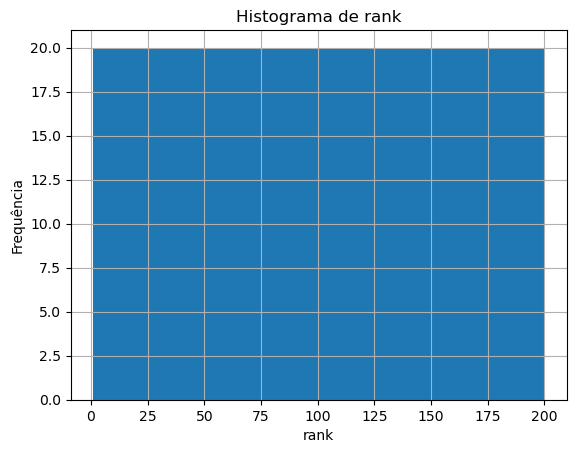

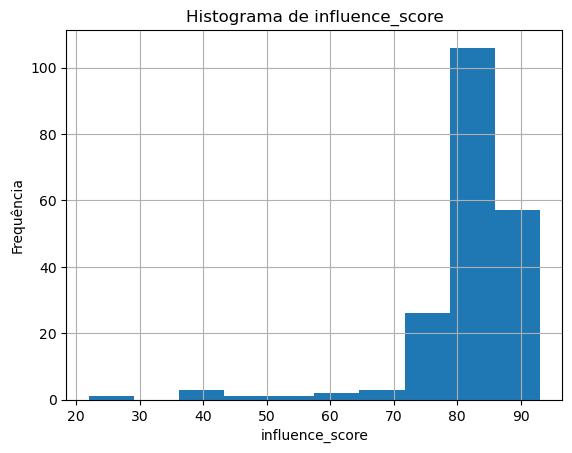

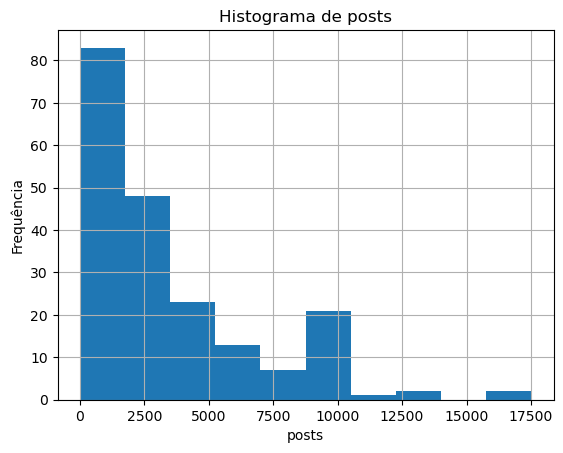

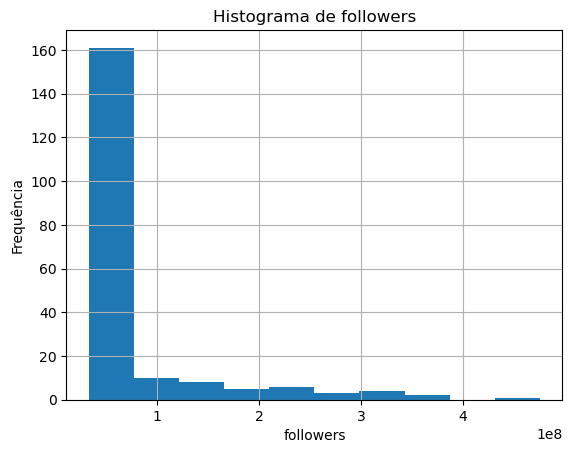

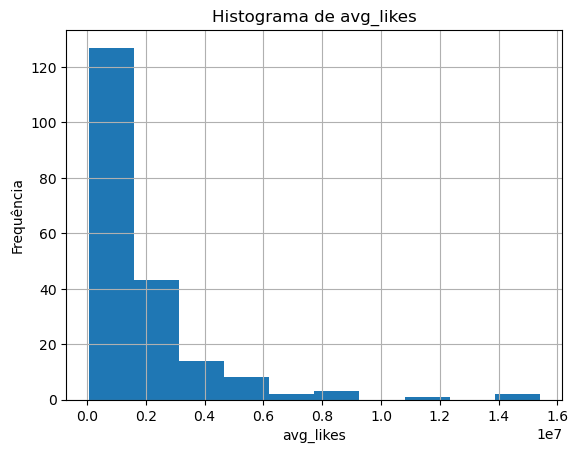

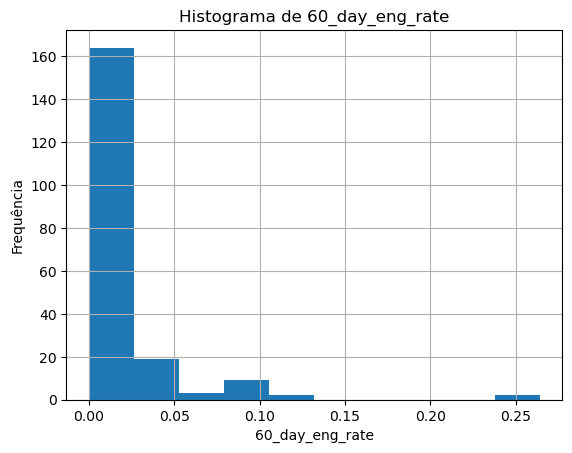

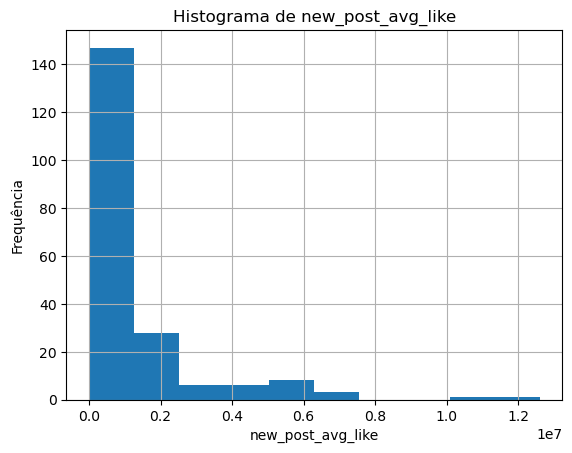

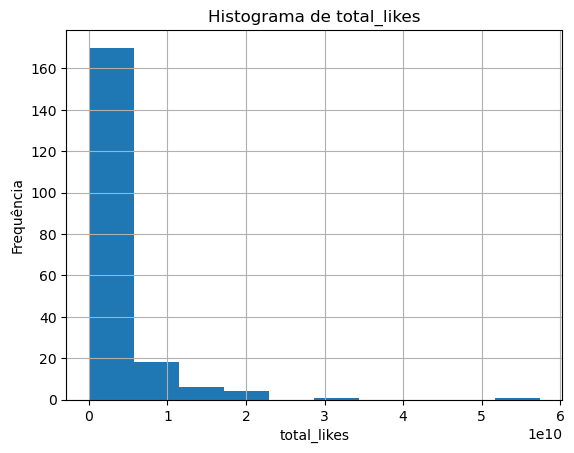

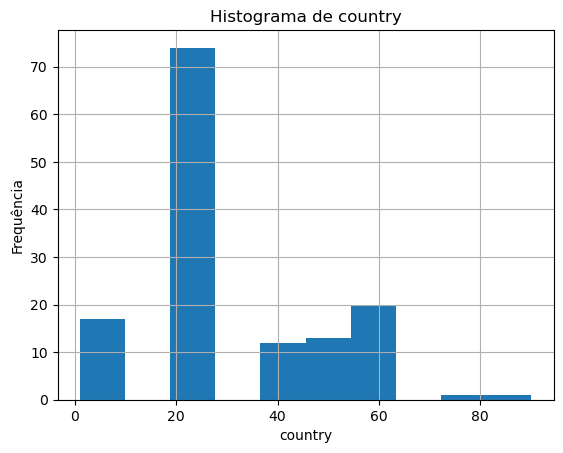

In [1726]:
# Iterar sobre todas as colunas numéricas e plotar os histogramas
for column in numeric_columns:
    # Coloquei em intervalos de 10
    df[column].hist(bins=10)
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

### Boxplots

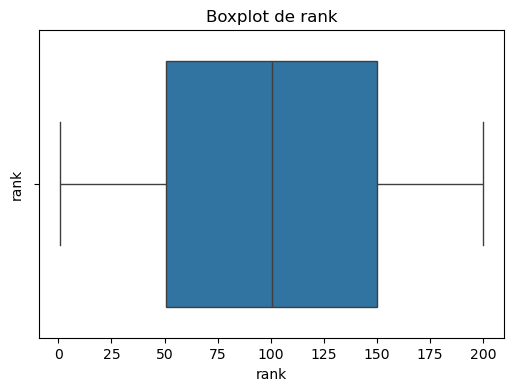

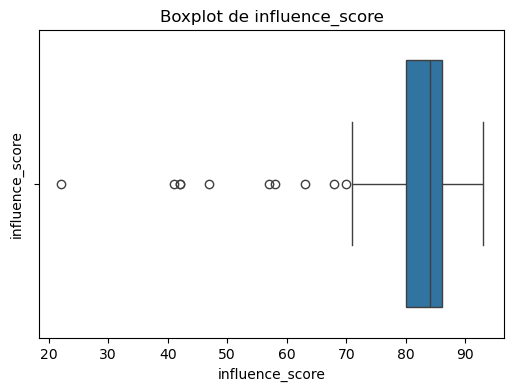

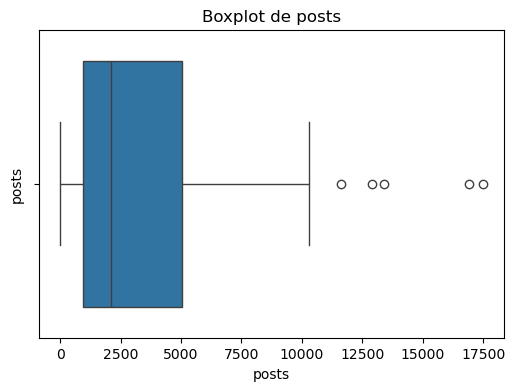

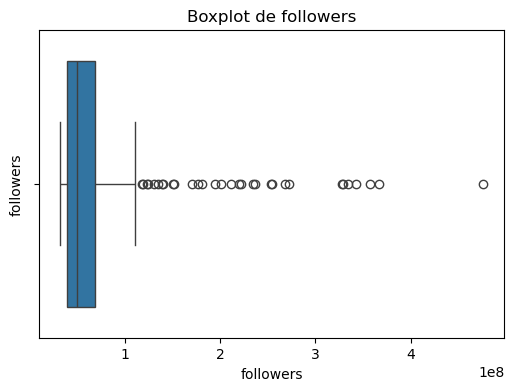

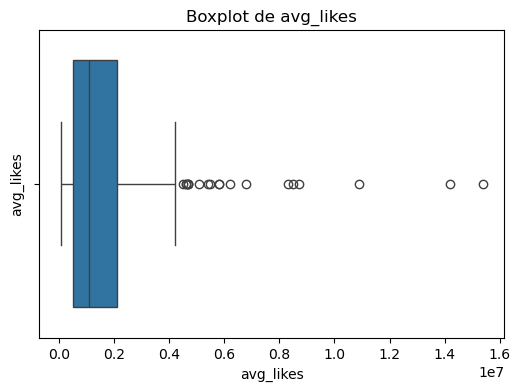

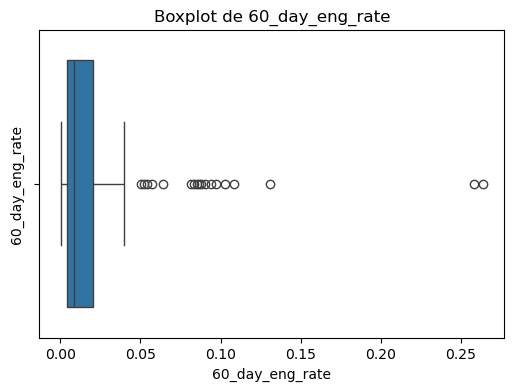

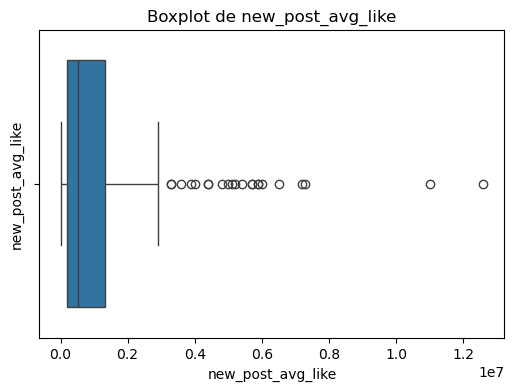

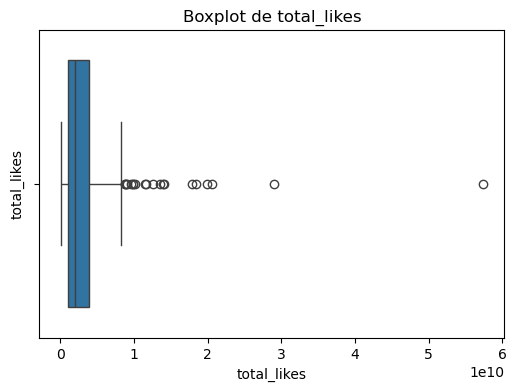

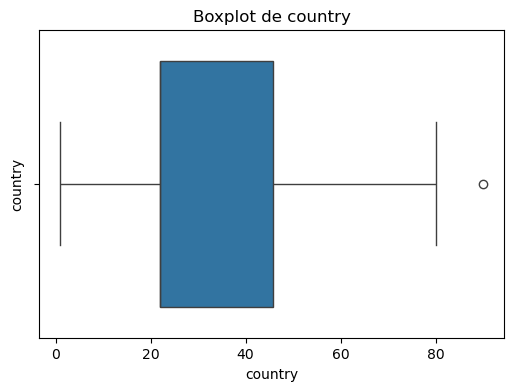

In [1728]:
for column in numeric_columns:
    plt.figure(figsize=(6, 4))  # Tamanho da figura
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot de {column}")
    plt.ylabel(column)
    plt.show()

**Interpretação:** Com os histogramas é possível perceber uma maior frequência de valores em intervalos específicos e alguns intervalos não possuem valores, além disso, as colunas posts, followers, avg_likes, total_likes, 60_day_eng_rate e new_post_avg_like possuem assimetria positiva. No boxplot é obersavado a existência de outliers em todas as colunas do dataset.

## Relação entre Variáveis Númericas

### Matriz de Correlação

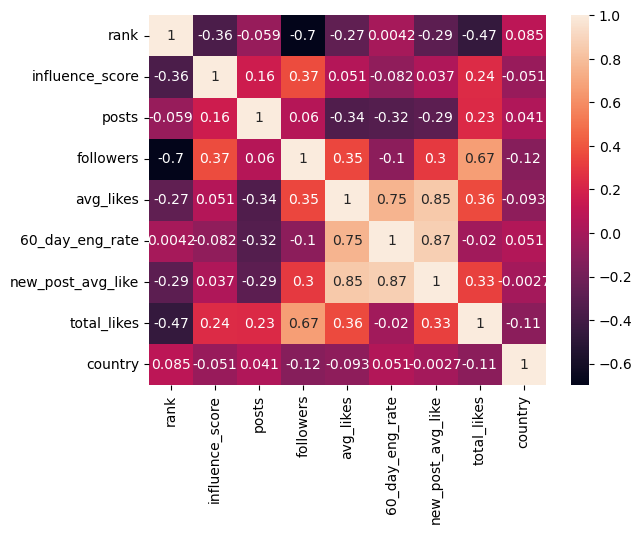

In [1732]:
# Calcula a matriz de correlação
corr_matrix = df[numeric_columns].corr()

# Visualize a matriz de correlação
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Interpretação:** É possível observar que avg_likes, 60_day_eng_rate e new_post_avg_like são às colunas que possuem maior correlação entre sim. O target do modelo será o 60_day_eng_rate (taxa de engajamento).

### Gráficos de Dispersão (Scatter Plot)

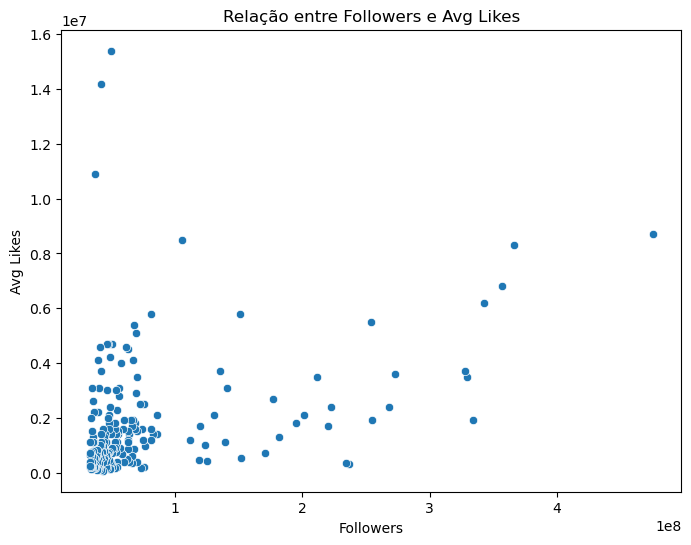

In [1735]:
# Gráfico de dispersão entre followers e avg_likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='followers', y='avg_likes')
plt.title("Relação entre Followers e Avg Likes")
plt.xlabel("Followers")
plt.ylabel("Avg Likes")
plt.show()

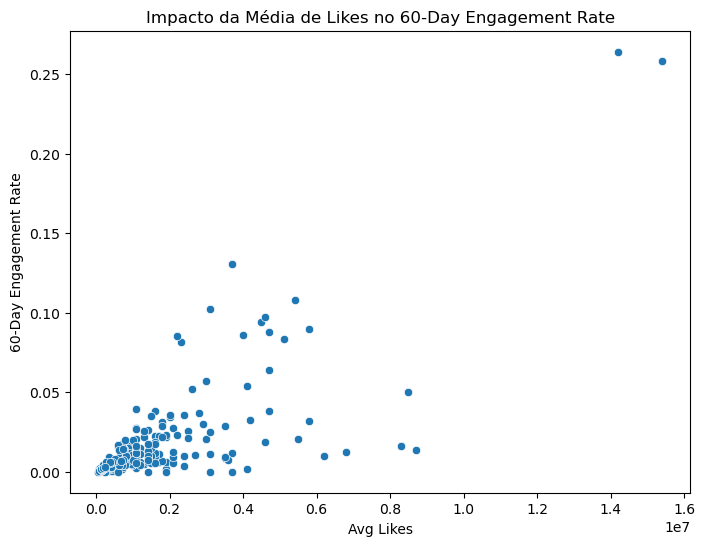

In [1736]:
# Gráfico de dispersão entre 60_day_eng_rate e avg_likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_likes', y='60_day_eng_rate')
plt.title("Impacto da Média de Likes no 60-Day Engagement Rate")
plt.xlabel("Avg Likes")
plt.ylabel("60-Day Engagement Rate")
plt.show()

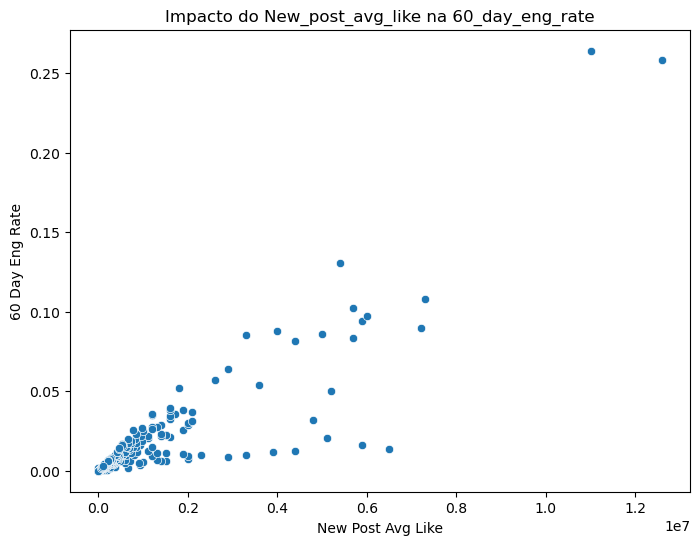

In [1737]:
# Gráfico de dispersão entre new_post_avg_lie e 60_day_eng_rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='new_post_avg_like', y='60_day_eng_rate')
plt.title("Impacto do New_post_avg_like na 60_day_eng_rate")
plt.xlabel("New Post Avg Like")
plt.ylabel("60 Day Eng Rate")
plt.show()

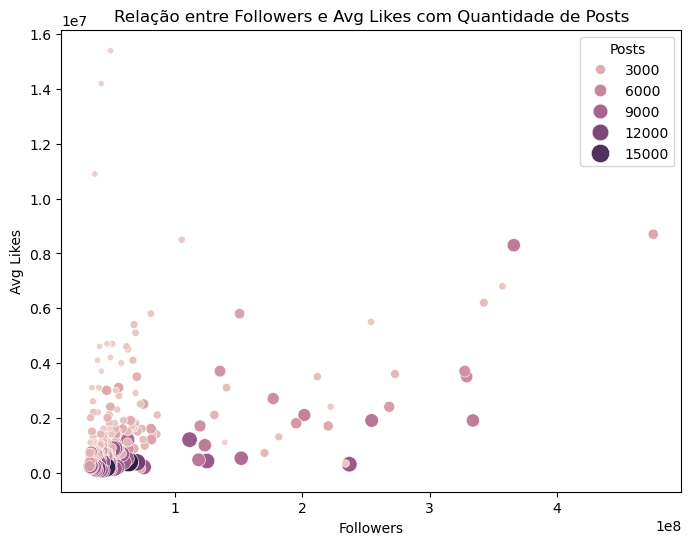

In [1738]:
# Gráfico de dispersão com uma terceira variável
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='followers', y='avg_likes', hue='posts', size='posts', sizes=(20, 200))
plt.title("Relação entre Followers e Avg Likes com Quantidade de Posts")
plt.xlabel("Followers")
plt.ylabel("Avg Likes")
plt.legend(title="Posts")
plt.show()

**Interpretação:** No gráfico de followers x avg_likes vemos que quanto mais followers, maior a avg_likes. No gráfico avg_likes x 60_day_eng_rate é notável também que a media das curtidas é maior quando a taxa de engajamento do perfil também é maior. Em new_post_avg_like x 60_day_eng_rate também é observado esse fato. No último gráfico foi adicionado uma terceira váriavel (posts) para observar qual séria a relação entre ela e followers x avg_likes. Nesse gráfico é perceptível que perfis com pouco followers, além de terem uma baixa média de likes, também possuem poucos posts.

## Tratamento de Valores NaN

In [1741]:
# O KNN não pode ser implementado enquanto houver valores NaN no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 15.8+ KB


In [1742]:
# Com o df.info podemos perceber que a coluna country possui possui valores NaN e 60_day_eng_rate possui apenas um valor NaN

# Irei testar o comportamento da coluna country quando eu atribuo aos 62 valores NaN a moda da coluna
country_test_mode = df['country'].fillna(df['country'].mode()[0])

# Não dropei o valor NaN da taxa de engajamento, ao invés disso atribuí a mediana
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    200 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 15.8+ KB


### Histograma e Boxplot de Country

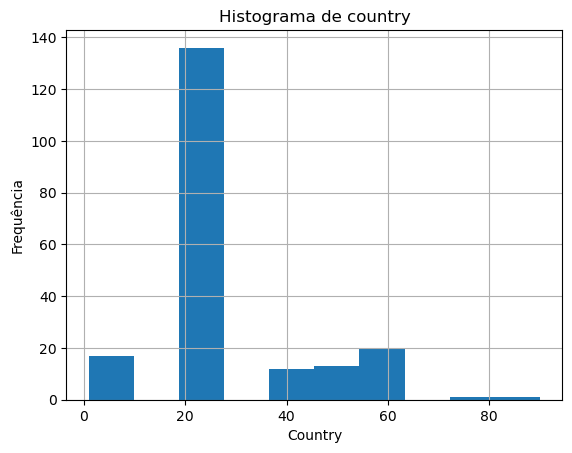

In [1744]:

# Coloquei em intervalos de 10
country_test_mode.hist(bins=10)
plt.title(f"Histograma de country")
plt.xlabel('Country')
plt.ylabel('Frequência')
plt.show()

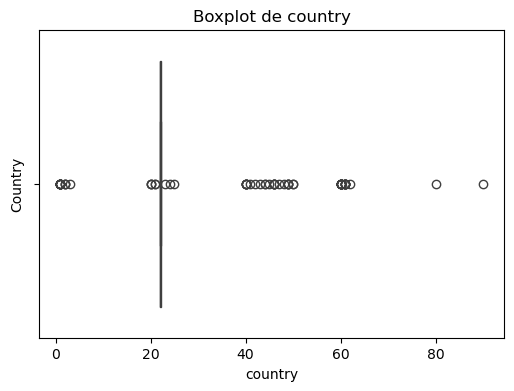

In [1745]:
plt.figure(figsize=(6, 4))  # Tamanho da figura
sns.boxplot(x=country_test_mode)  # Passando diretamente a Série para o x
plt.title("Boxplot de country")
plt.ylabel('Country')
plt.show()

### Distribuição de Country (Sem substituição e Com substituição pela moda)

country
22.0    66
1.0     13
60.0    12
61.0     7
40.0     6
46.0     5
49.0     4
2.0      3
20.0     3
21.0     2
50.0     2
44.0     2
48.0     1
41.0     1
42.0     1
25.0     1
47.0     1
90.0     1
24.0     1
80.0     1
23.0     1
62.0     1
43.0     1
3.0      1
45.0     1
Name: count, dtype: int64


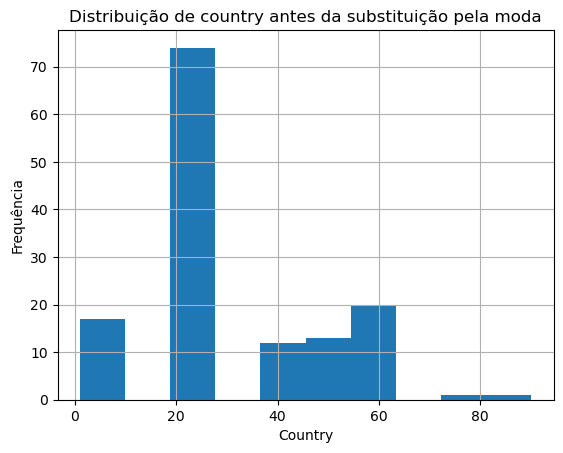

In [1747]:
print(df['country'].value_counts())
df['country'].hist(bins=10)
plt.title("Distribuição de country antes da substituição pela moda")
plt.xlabel('Country')
plt.ylabel('Frequência')
plt.show()

country
22.0    128
1.0      13
60.0     12
61.0      7
40.0      6
46.0      5
49.0      4
2.0       3
20.0      3
21.0      2
50.0      2
44.0      2
48.0      1
41.0      1
42.0      1
25.0      1
47.0      1
90.0      1
24.0      1
80.0      1
23.0      1
62.0      1
43.0      1
3.0       1
45.0      1
Name: count, dtype: int64


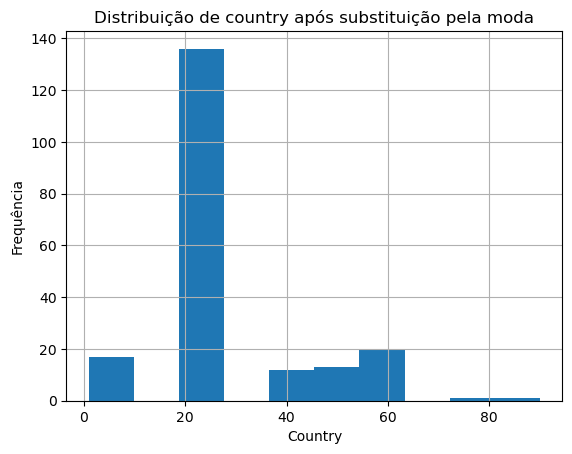

In [1748]:
print(country_test_mode.value_counts())
country_test_mode.hist(bins=10)
plt.title("Distribuição de country após substituição pela moda")
plt.xlabel('Country')
plt.ylabel('Frequência')
plt.show()

**Interpretação:** Como podemos observar nos gráficos, especialmente no boxplot, a substituição de valores NaN pela moda não agrega valor significativo à distribuição da variável. Na realidade, ocorre o oposto: a substituição pela moda resulta em um aumento excessivo de valores concentrados em torno de um único valor (a moda), o que pode prejudicar a qualidade do modelo. Isso ocorre porque, no contexto de um modelo como o KNN, essa concentração pode introduzir uma distorção nas distâncias calculadas, tornando-as mais semelhantes entre os pontos que possuem a moda como valor.

In [1750]:
# Dropo todas as linhas que têm NaN na coluna 'country'
df = df.dropna(subset=['country'])

df.isnull().sum()

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

In [1751]:
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,138.000000
mean,96.391304,81.652174,4032.318841,8.372609e+07,1.492658e+06,0.013315,9.673341e+05,4.275290e+09,30.050725
std,59.613528,8.720855,3586.774630,8.103318e+07,1.537165e+06,0.017964,1.320879e+06,6.450630e+09,18.959936
min,1.000000,41.000000,20.000000,3.280000e+07,6.510000e+04,0.000100,0.000000e+00,1.830000e+07,1.000000
25%,47.250000,79.250000,1400.000000,4.100000e+07,4.231750e+05,0.003350,1.810250e+05,1.400000e+09,22.000000
50%,93.000000,83.000000,2900.000000,5.270000e+07,1.100000e+06,0.006800,4.245500e+05,2.300000e+09,22.000000
75%,145.250000,86.000000,6125.000000,7.032500e+07,1.900000e+06,0.015100,1.200000e+06,4.550000e+09,45.750000
max,200.000000,93.000000,17500.000000,4.758000e+08,8.700000e+06,0.102500,6.500000e+06,5.740000e+10,90.000000


# Implementação do Algoritmo

## Remoção de Outliers Usando IQR

In [1754]:
# Criando uma variável e atribuindo o dataset nela
df_filtered = df.copy()

for column in df_filtered.drop(columns=['channel_info', '60_day_eng_rate']):
    # Utilizando o IQR para remover os outliers do dataset
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df_filtered = df_filtered[(df_filtered[column] >= lower_limit) & (df_filtered[column] <= upper_limit)]

df_filtered.describe()

df = df_filtered

## Aplicação do KNN (Sem normalização)

In [1756]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1757]:
# Inicialmente usei todas as colunas (menos channel_info) entretanto o modelo não ficou bom e decidi usar somente as colunas com alta correlação com o meu target
X = df[['avg_likes', 'new_post_avg_like']]
y = df['60_day_eng_rate']

In [1758]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1759]:
# Coloquei um valor aleatório só para teste
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsRegressor()

Erro médio absoluto (MAE): 0.0018066666666666663
Erro médio quadrático (MSE): 5.972044444444443e-06
Raiz do Erro médio quadrático (RMSE): 0.002443776676467071


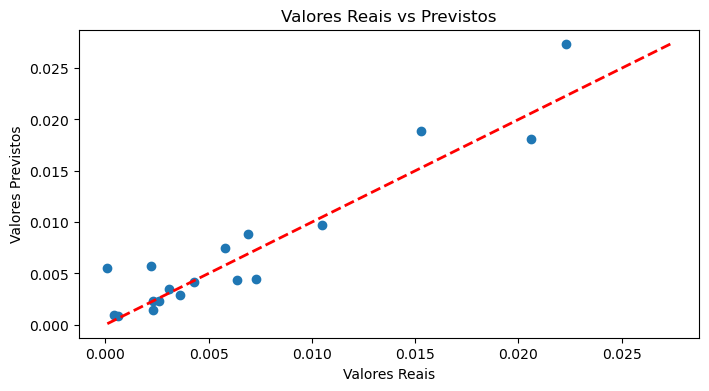

In [1760]:
# Realizando a predição com o conjunto de teste
y_pred = model.predict(X_test)

# Calculando o média de erro absoluto
mae = mean_absolute_error(y_test, y_pred)

# Calculando o MSE (Erro Quadrático Médio)
mse = mean_squared_error(y_test, y_pred)

# Calculando o RMSE (Raiz do Erro Quadrático Médio)
rmse = np.sqrt(mse)

# Aqui exibi as métricas
print(f'Erro médio absoluto (MAE): {mae}')
print(f'Erro médio quadrático (MSE): {mse}')
print(f'Raiz do Erro médio quadrático (RMSE): {rmse}')

#Visualiznado os reais x previstos
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred)

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle = '--', lw=2)
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

## Validação Cruzada

In [1762]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

# Exibir as métricas de avaliação
print("Acurácia por fold:", scores)
print("Acurácia média:", np.mean(scores))
print("Desvio padrão:", np.std(scores))

Acurácia por fold: [0.53132227 0.82405989 0.79609431 0.86794228 0.55141594]
Acurácia média: 0.714166935046496
Desvio padrão: 0.14307723161675343


**Interpretação:** O MAE, MSE e RMSE são baixos, indicando que o modelo está errando pouco e que o modelo está bastante próximo dos valores reais. Também tem baixo desvio em relação aos valores reais e não está cometendo erros grandes. Na média de acurácia dos folds obtive 71,4% indicando que o modelo teve um desempenho razoável. O desvio padrão pode indicar uma inconsistência entre os folds.

# Otimização

## Sem Normalização

### Usando GridSearch para k e métrica de distância

In [1767]:
from sklearn.model_selection import GridSearchCV 

# Aqui eu defini o modelo e os parametros de busca(intervalo)
clf = KNeighborsRegressor()
k_list = list(range(1, 25))
parameters = {'n_neighbors':k_list,'metric':['euclidean', 'minkowski', 'manhattan','chebyshev']}

# Aqui eu configurei o GridSearchCV usando o regressor, passando o range de vizinhos, numero de folds e passando a métrica de avaliação
# Passei neg_maen_absolute_error porque o GridSearchCV é uma função que busca a otimizaçao, então nao coloquei o mae que é melhor quanndo seu valor é menor
# Mas sim a negação da métrica porque busco otimização, ou seja, quanto mais negativo o valor, melhor, porque indica um erro menor.
grid = GridSearchCV(clf,parameters,cv=5,scoring='neg_mean_absolute_error')
grid.fit(X,y)
                    
# Aqui eu mostro os resultados
scores = pd.DataFrame(grid.cv_results_)
scores.head()

grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 10}

### Aplicação do KNN

In [1769]:
model = KNeighborsRegressor(metric = 'euclidean', n_neighbors = 10)
model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=10)

Erro médio absoluto (MAE): 0.0018366666666666661
Erro médio quadrático (MSE): 6.1239777777777765e-06
Raiz do Erro médio quadrático (RMSE): 0.002474667205459711


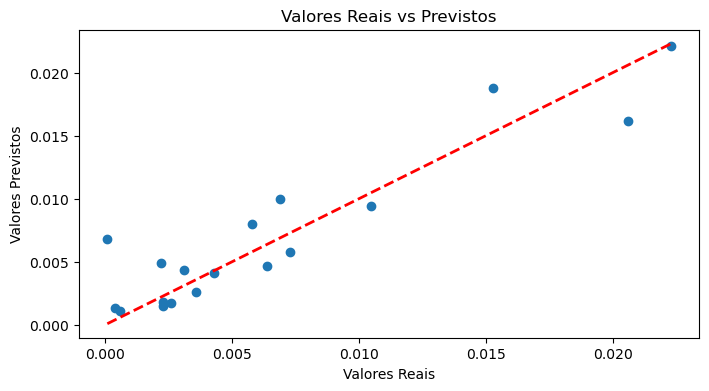

In [1770]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Aqui exibi as métricas
print(f'Erro médio absoluto (MAE): {mae}')
print(f'Erro médio quadrático (MSE): {mse}')
print(f'Raiz do Erro médio quadrático (RMSE): {rmse}')

#Visualiznado os reais x previstos
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred)

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle = '--', lw=2)
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

### Validação Cruzada

In [1772]:
scores_with_grid = cross_val_score(model, X, y, cv=5)

# Exibir as métricas de avaliação
print("Acurácia por fold:", scores_with_grid)
print("Acurácia média:", np.mean(scores_with_grid))
print("Desvio padrão:", np.std(scores_with_grid))

Acurácia por fold: [0.64775515 0.92323564 0.72196093 0.80850336 0.533778  ]
Acurácia média: 0.7270466146127272
Desvio padrão: 0.1332599648574771


**Interpretação:** O MAE, MSE e RMSE também são baixos, indicando que o modelo está errando pouco e que o modelo está bastante próximo dos valores reais. Também tem baixo desvio em relação aos valores reais e não está cometendo erros grandes. Analisando a acurácia por fold, temos alguns valores muito bons como 0,92 e 0,80. E a acurácia média do modelo foi de 72,7% indicando pontos de melhoria.

## Com Normalização

### Normalização das Variáveis Independentes

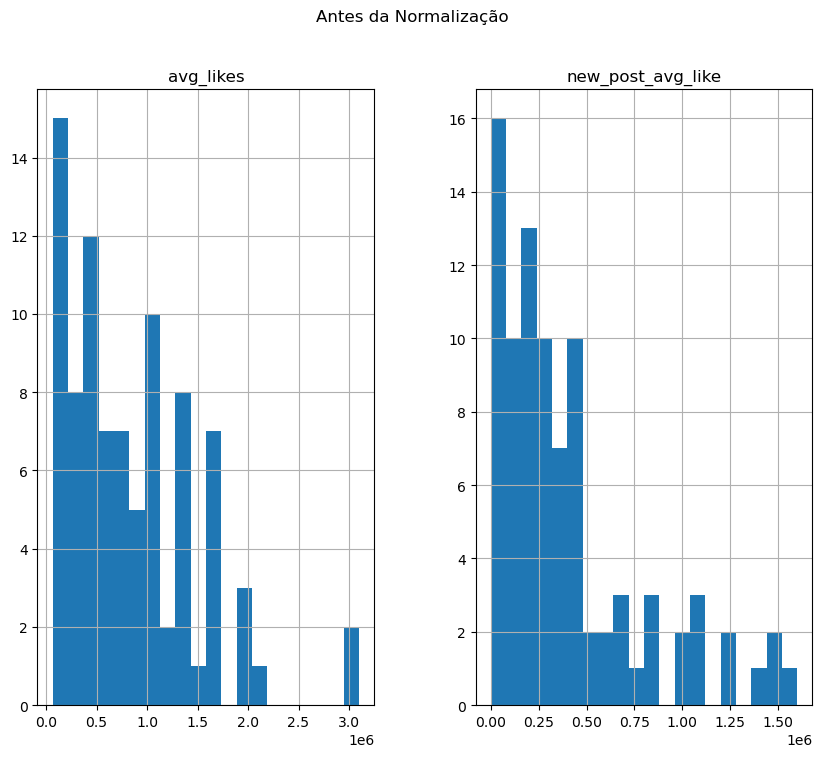

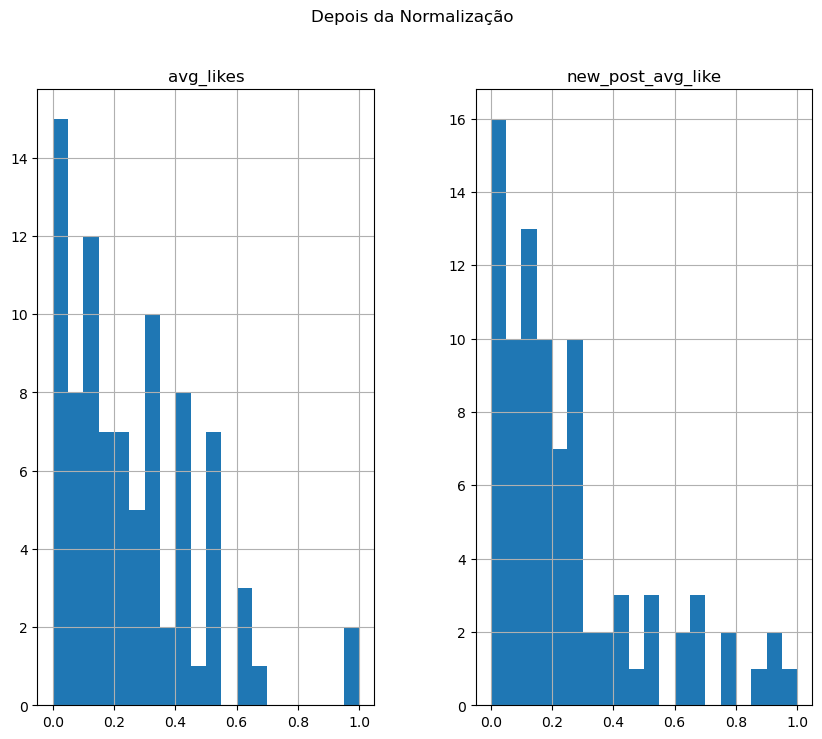

In [1776]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando as variáveis independentes
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Histograma dos dados antes da normalização
X.hist(bins=20, figsize=(10, 8))
plt.suptitle('Antes da Normalização')
plt.show()

# Quando aplico o scaler o X_normalized vira um array numpy, por isso precisei realizar essa conversão
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Histograma dos dados depois da normalização
X_normalized_df.hist(bins=20, figsize=(10, 8))
plt.suptitle('Depois da Normalização')
plt.show()

### Usando GridSearch para k e métrica de distância

In [1778]:
grid.fit(X_normalized_df,y)
                    
# Mostrando os resultados
scores = pd.DataFrame(grid.cv_results_)
scores.head()

grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

### Aplicação do KNN

In [1780]:
# Convertendo para um dataframe novamente 
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_train, X_normalized_test, y_normalized_train, y_normalized_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)


In [1781]:
model_normalized = KNeighborsRegressor(metric = 'euclidean', n_neighbors = 11)

In [1782]:
model_normalized.fit(X_normalized_train, y_normalized_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=11)

Erro médio absoluto (MAE): 0.0019303030303030307
Erro médio quadrático (MSE): 6.8165381083562905e-06
Raiz do Erro médio quadrático (RMSE): 0.002610850073894763


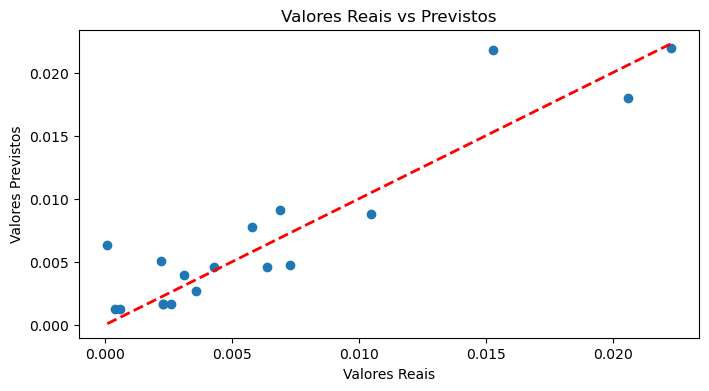

In [1783]:
y_pred_normalized = model_normalized.predict(X_normalized_test)

# Calculando o média de erro absoluto
mae_normalized = mean_absolute_error(y_normalized_test, y_pred_normalized)

# Calculando o MSE (Erro Quadrático Médio)
mse_normalized = mean_squared_error(y_normalized_test, y_pred_normalized)

# Calculando o RMSE (Raiz do Erro Quadrático Médio)
rmse_normalized = np.sqrt(mse_normalized)

# Aqui exibi as métricas
print(f'Erro médio absoluto (MAE): {mae_normalized}')
print(f'Erro médio quadrático (MSE): {mse_normalized}')
print(f'Raiz do Erro médio quadrático (RMSE): {rmse_normalized}')

# Visualiznado os reais x previstos
plt.figure(figsize=(8,4))
plt.scatter(y_normalized_test, y_pred_normalized)

min_value_n = min(min(y_normalized_test), min(y_pred_normalized))
max_value_n = max(max(y_normalized_test), max(y_pred_normalized))
plt.plot([min_value_n, max_value_n], [min_value_n, max_value_n], color='red', linestyle = '--', lw=2)
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()


### Validação Cruzada

In [1785]:
from sklearn.model_selection import cross_val_score

scores_normalized = cross_val_score(model_normalized, X_normalized, y, cv=5)

# Exibir as métricas de avaliação
print("Acurácia por fold:", scores_normalized)
print("Acurácia média:", np.mean(scores_normalized))
print("Desvio padrão:", np.std(scores_normalized))

Acurácia por fold: [0.65755947 0.96133962 0.74187114 0.8804931  0.60013666]
Acurácia média: 0.7682799983672477
Desvio padrão: 0.13497588046710107


**Interpretação:**  MAE, MSE e RMSE continuam baixo, mostrando que o modelo está próximo dos valores reais (errando pouco). Analisando os folds, houve uma melhoria baixa na maioria dos folds. Além disso, a acurácia média foi aumentou 4%, exibindo uma melhoria no modelo. Entretanto, o desvio padrão continua alto, podendo ser ele o motivo da inconsistência entre os folds. 

# Conclusão 

o modelo foi treinado em diferente cenários (sem normalização, com normalização, utilizando o GridSearch para encontrar o melhor valor de k e a métrica de distância), foi obtido um resultado razoável em termos de acurácia por fold, embora com um desvio padrão relativamente alto. Isso revela que o modelo é sensível à escolha dos dados, mas ainda assim apresenta um desempenho satisfatório. Além disso, os valores de MAE, MSE e RMSE são baixos, indicando que o modelo está errando pouco em suas previsões. Por fim, o modelo foi treinado com variáveis que tinham alto correlação com o target, sendo uma decisão estratégica para melhorar a eficiência do modelo.